In [2]:
import perf
import pathlib
import pandas
import altair

In [3]:
def get_items():
    for path in pathlib.Path('.').glob("*.json"):
        _, reduced = path.stem.split('-', 2)
        is_reduced = reduced == 'reduced'
        benchmark = perf.Benchmark.load(str(path))
        n = int(benchmark.get_name())
        for value in benchmark.get_values():
            yield {"n": n, "time": value, "reduced": is_reduced}


In [4]:
df = pandas.DataFrame(get_items())
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 3 columns):
n          1680 non-null int64
reduced    1680 non-null bool
time       1680 non-null int64
dtypes: bool(1), int64(2)
memory usage: 28.0 KB


,n,reduced,time
0,140,False,1355743232
1,140,False,1355804672
2,140,False,1355694080
3,140,False,1355767808
4,140,False,1355845632


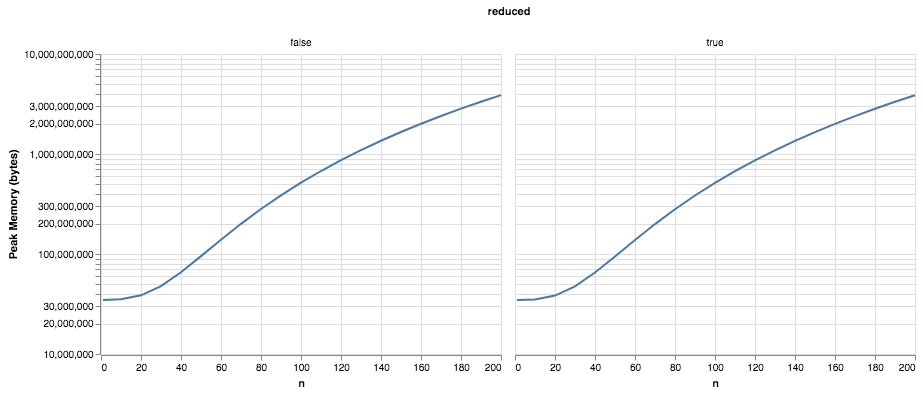

In [5]:
points = altair.Chart(df).mark_line().encode(
    altair.Y(
        'mean(time)',
        scale=altair.Scale(type='log', zero=False),
        axis=altair.Axis(title='Peak Memory (bytes)'),
    ),
    x='n',
    column='reduced',
#     column='n',
)


points

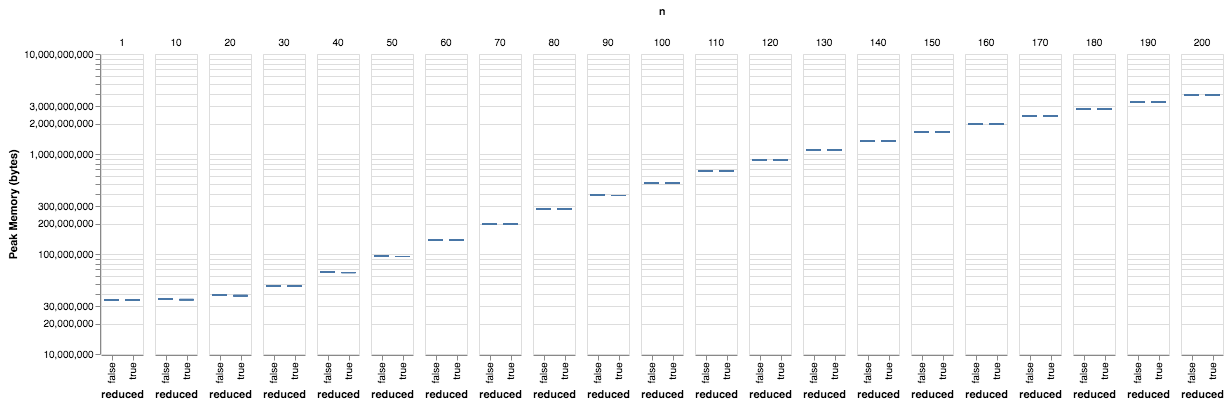

In [10]:
points = altair.Chart(df).mark_tick().encode(
    altair.Y(
        'time',
        scale=altair.Scale(type='log', zero=False),
        axis=altair.Axis(title='Peak Memory (bytes)'),
    ),
    x='reduced',
#     color='reduced',
    column='n',
)


points